In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
!pip install -q pytube #To download Youtube videos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


In [4]:
!pip install -q moviepy #To extract audio from downloaded videos

In [5]:
!pip install -q SpeechRecognition pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 36.5 MB/s eta 0:00:00


In [6]:
!pip install -U assemblyai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00


In [7]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [23]:
youtube_video = input("Enter Youtube Video Link")

Enter Youtube Video Linkhttps://www.youtube.com/watch?v=HB4I2CgkcCo


In [24]:
video_id = youtube_video.split("=")[1]
print(video_id)

HB4I2CgkcCo


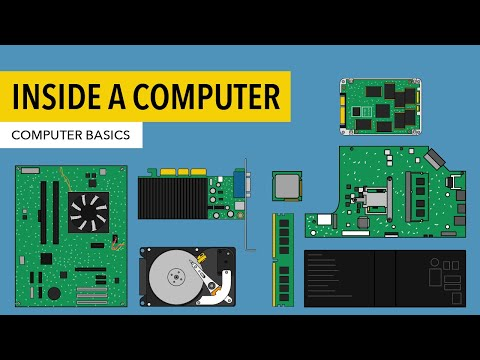

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [27]:
from pytube import YouTube
from moviepy.editor import *
yt = YouTube(youtube_video)#Download Video
stream = yt.streams.get_highest_resolution()
stream.download()
video = VideoFileClip('video.mp4')#Extracting audio from downloaded video
audio = video.audio
audio.write_audiofile('video.mp3')#Deleting the downloaded video file
os.remove('video.mp4')

MoviePy - Writing audio in video.mp3


MoviePy - Done.


In [28]:
import speech_recognition as sr
filename = "video.mp3"
r = sr.Recognizer()

In [29]:
import assemblyai as aai
aai.settings.api_key = f"1b315f42226848dba99be2b318c4a365"
FILE_URL = "/content/video.mp3"
transcriber = aai.Transcriber()
transcript = transcriber.transcribe(FILE_URL)
print(transcript.text)

You may already know that there are many important parts inside a computer, but what exactly do they do? Let's take a look inside and learn about the various components that make a computer work. Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard. This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor. The CPU can be considered the brain of the computer because it processes information and carries out commands. Since it tends to get hot, it's covered by a piece of metal called a heatsink, which draws heat away from the processor. The motherboard also contains the computer's ram, or random access memory. This is the short term memory that the computer uses whenever it's performing calculations. However, you cannot store your files there because the ram is cleared when you shut off the computer. The hard drive provides long term storage, keeping all of t

In [35]:
print(type(transcript.text))

<class 'str'>


TEXT SUMMARIZATION

In [37]:
text = transcript.text
print(text)

You may already know that there are many important parts inside a computer, but what exactly do they do? Let's take a look inside and learn about the various components that make a computer work. Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard. This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor. The CPU can be considered the brain of the computer because it processes information and carries out commands. Since it tends to get hot, it's covered by a piece of metal called a heatsink, which draws heat away from the processor. The motherboard also contains the computer's ram, or random access memory. This is the short term memory that the computer uses whenever it's performing calculations. However, you cannot store your files there because the ram is cleared when you shut off the computer. The hard drive provides long term storage, keeping all of t

In [38]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [40]:
stopwords = STOP_WORDS

In [41]:
print(stopwords)

{'across', 'i', 'up', '‘re', 'per', 'is', 'she', 'ten', 'cannot', '’ll', 'using', 'anyway', 'name', 'do', 'much', 'five', 'either', 'same', 'rather', 'whither', '‘ll', 'none', 'whatever', 'moreover', 'whence', 'ca', 'someone', 'further', 'hers', 'their', 'hence', 'above', 'by', 'namely', 'ours', 'somehow', "'m", '’ve', 'only', 'between', 'down', 'take', 'thereupon', 'fifteen', 'whom', 'sometime', 'often', 'else', 'becoming', 'doing', 'we', '’d', 'put', 'become', 'a', '’s', 'whereas', 'serious', 'whoever', 'nine', 'n‘t', 'her', 'besides', 'since', 'give', 'others', 'via', 'against', 'most', 'or', 'call', 'this', 'however', 'could', 'there', 'almost', 'may', 'whereupon', 'below', 'without', 'to', 'thereby', 'twelve', 'anywhere', 'otherwise', 'full', 'yourself', 'anything', 'show', 'thru', 'due', 'although', 'its', 'your', 'still', 'itself', 'too', 'me', 'as', 'another', 'until', 'us', 'before', 'myself', '‘s', 'two', 'but', 'once', 'toward', 'out', 'many', 'everyone', 'afterwards', 'then

In [42]:
nlp = spacy.load('en_core_web_sm')

In [43]:
doc = nlp(text)

In [44]:
print(doc)

You may already know that there are many important parts inside a computer, but what exactly do they do? Let's take a look inside and learn about the various components that make a computer work. Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard. This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor. The CPU can be considered the brain of the computer because it processes information and carries out commands. Since it tends to get hot, it's covered by a piece of metal called a heatsink, which draws heat away from the processor. The motherboard also contains the computer's ram, or random access memory. This is the short term memory that the computer uses whenever it's performing calculations. However, you cannot store your files there because the ram is cleared when you shut off the computer. The hard drive provides long term storage, keeping all of t

In [45]:
tokens = [token.text for token in doc]
print(tokens) #Punctuations and stop words are also the part of tokens

['You', 'may', 'already', 'know', 'that', 'there', 'are', 'many', 'important', 'parts', 'inside', 'a', 'computer', ',', 'but', 'what', 'exactly', 'do', 'they', 'do', '?', 'Let', "'s", 'take', 'a', 'look', 'inside', 'and', 'learn', 'about', 'the', 'various', 'components', 'that', 'make', 'a', 'computer', 'work', '.', 'Whether', 'it', "'s", 'a', 'desktop', 'computer', 'or', 'a', 'laptop', ',', 'every', 'computer', 'has', 'a', 'large', 'circuit', 'board', 'called', 'a', 'motherboard', '.', 'This', 'contains', 'some', 'of', 'the', 'most', 'important', 'parts', 'of', 'the', 'computer', ',', 'such', 'as', 'the', 'CP', ',', 'also', 'known', 'as', 'the', 'central', 'processing', 'unit', 'or', 'processor', '.', 'The', 'CPU', 'can', 'be', 'considered', 'the', 'brain', 'of', 'the', 'computer', 'because', 'it', 'processes', 'information', 'and', 'carries', 'out', 'commands', '.', 'Since', 'it', 'tends', 'to', 'get', 'hot', ',', 'it', "'s", 'covered', 'by', 'a', 'piece', 'of', 'metal', 'called', 'a

In [46]:
#Removing stop words and punctuations
print(punctuation)
#The list of punctuation does not have new line, therfore we will add new line to it
punctuation = punctuation + "\n"

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


1) TEXT CLEANING i.e. removing stop words and punctuations

In [49]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] +=1
print(word_frequencies)

{'know': 1, 'important': 2, 'parts': 2, 'inside': 3, 'computer': 12, 'exactly': 1, 'Let': 1, 'look': 1, 'learn': 1, 'components': 3, 'work': 1, 'desktop': 2, 'laptop': 1, 'large': 1, 'circuit': 1, 'board': 1, 'called': 2, 'motherboard': 3, 'contains': 2, 'CP': 1, 'known': 1, 'central': 1, 'processing': 1, 'unit': 2, 'processor': 2, 'CPU': 1, 'considered': 1, 'brain': 1, 'processes': 1, 'information': 1, 'carries': 1, 'commands': 1, 'tends': 1, 'hot': 1, 'covered': 1, 'piece': 1, 'metal': 1, 'heatsink': 1, 'draws': 1, 'heat': 1, 'away': 1, 'ram': 2, 'random': 1, 'access': 1, 'memory': 2, 'short': 1, 'term': 2, 'uses': 1, 'performing': 1, 'calculations': 1, 'store': 2, 'files': 1, 'cleared': 1, 'shut': 1, 'hard': 2, 'drive': 1, 'provides': 1, 'long': 1, 'storage': 1, 'keeping': 1, 'data': 2, 'turned': 1, 'drives': 2, 'use': 2, 'magnetic': 1, 'platter': 1, 'newer': 1, 'computers': 2, 'solid': 1, 'state': 1, 'faster': 1, 'durable': 1, 'expensive': 1, 'expansion': 3, 'slots': 2, 'allow': 1,

In [63]:
max_freq = max(word_frequencies.values())
max_freq = 12
print(max_freq)


12


In [52]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_freq

In [61]:
for x in word_frequencies.values():
  if(x==1.0):
    print(word_frequencies)
    break

{'know': 0.08333333333333333, 'important': 0.16666666666666666, 'parts': 0.16666666666666666, 'inside': 0.25, 'computer': 1.0, 'exactly': 0.08333333333333333, 'Let': 0.08333333333333333, 'look': 0.08333333333333333, 'learn': 0.08333333333333333, 'components': 0.25, 'work': 0.08333333333333333, 'desktop': 0.16666666666666666, 'laptop': 0.08333333333333333, 'large': 0.08333333333333333, 'circuit': 0.08333333333333333, 'board': 0.08333333333333333, 'called': 0.16666666666666666, 'motherboard': 0.25, 'contains': 0.16666666666666666, 'CP': 0.08333333333333333, 'known': 0.08333333333333333, 'central': 0.08333333333333333, 'processing': 0.08333333333333333, 'unit': 0.16666666666666666, 'processor': 0.16666666666666666, 'CPU': 0.08333333333333333, 'considered': 0.08333333333333333, 'brain': 0.08333333333333333, 'processes': 0.08333333333333333, 'information': 0.08333333333333333, 'carries': 0.08333333333333333, 'commands': 0.08333333333333333, 'tends': 0.08333333333333333, 'hot': 0.08333333333

In [54]:
print(word_frequencies)

{'know': 0.08333333333333333, 'important': 0.16666666666666666, 'parts': 0.16666666666666666, 'inside': 0.25, 'computer': 1.0, 'exactly': 0.08333333333333333, 'Let': 0.08333333333333333, 'look': 0.08333333333333333, 'learn': 0.08333333333333333, 'components': 0.25, 'work': 0.08333333333333333, 'desktop': 0.16666666666666666, 'laptop': 0.08333333333333333, 'large': 0.08333333333333333, 'circuit': 0.08333333333333333, 'board': 0.08333333333333333, 'called': 0.16666666666666666, 'motherboard': 0.25, 'contains': 0.16666666666666666, 'CP': 0.08333333333333333, 'known': 0.08333333333333333, 'central': 0.08333333333333333, 'processing': 0.08333333333333333, 'unit': 0.16666666666666666, 'processor': 0.16666666666666666, 'CPU': 0.08333333333333333, 'considered': 0.08333333333333333, 'brain': 0.08333333333333333, 'processes': 0.08333333333333333, 'information': 0.08333333333333333, 'carries': 0.08333333333333333, 'commands': 0.08333333333333333, 'tends': 0.08333333333333333, 'hot': 0.08333333333

In [64]:
sentence_tokenization = [sent for sent in doc.sents]
print(sentence_tokenization)

[You may already know that there are many important parts inside a computer, but what exactly do they do?, Let's take a look inside and learn about the various components that make a computer work., Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard., This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor., The CPU can be considered the brain of the computer because it processes information and carries out commands., Since it tends to get hot, it's covered by a piece of metal called a heatsink, which draws heat away from the processor., The motherboard also contains the computer's ram, or random access memory., This is the short term memory that the computer uses whenever it's performing calculations., However, you cannot store your files there because the ram is cleared when you shut off the computer., The hard drive provides long term storage, keepin

In [66]:
sentence_score = {}
for sent in sentence_tokenization:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_score.keys():
        sentence_score[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_score[sent] += word_frequencies[word.text.lower()]
print(sentence_score)

{You may already know that there are many important parts inside a computer, but what exactly do they do?: 1.7499999999999998, Let's take a look inside and learn about the various components that make a computer work.: 1.7499999999999998, Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard.: 2.916666666666667, This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor.: 2.083333333333333, The CPU can be considered the brain of the computer because it processes information and carries out commands.: 1.4999999999999998, Since it tends to get hot, it's covered by a piece of metal called a heatsink, which draws heat away from the processor.: 1.0833333333333335, The motherboard also contains the computer's ram, or random access memory.: 1.9166666666666665, This is the short term memory that the computer uses whenever it's performing calculations.: 1.666666666666

In [67]:
from heapq import nlargest

In [69]:
select_length = int(len(sentence_tokenization)*0.3)
print(select_length)

5


In [71]:
summary = nlargest(select_length, sentence_score, key = sentence_score.get)
print(summary)

[Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard., This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor., The hard drive provides long term storage, keeping all of the computer's data even when it's turned off., The motherboard also contains the computer's ram, or random access memory., The power supply unit is designed to take power from the wall outlet and send it to all of the different components that need power.]


In [73]:
final_summary = [word.text for word in summary]

In [74]:
summary = ' '.join(final_summary)

In [75]:
print(summary)

Whether it's a desktop computer or a laptop, every computer has a large circuit board called a motherboard. This contains some of the most important parts of the computer, such as the CP, also known as the central processing unit or processor. The hard drive provides long term storage, keeping all of the computer's data even when it's turned off. The motherboard also contains the computer's ram, or random access memory. The power supply unit is designed to take power from the wall outlet and send it to all of the different components that need power.
